<a href="https://colab.research.google.com/github/muwongelawrence-tech/colab_projects/blob/main/crops_and__weeds_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !wget https://drive.google.com/file/d/1MjlDFKUM4Yb6p0j9QLy0th2Uaqw-nqP-/view?usp=sharing \
# -O /tmp/weed_crop_classifier_dataset.zip

# Mounting google drive to get files from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Then unzip the files to be used 
# !unzip drive/My\ Drive/Data_sets/weed_crop_classifier_dataset.zip
# knowing the current directory with pwd commad
!pwd

/content


In [ ]:
# import os
# import zipfile

# local_zip = '/drive/MyDrive/Data_sets/weed_crop_classifier_dataset.zip'

# zip_ref = zipfile.ZipFile(local_zip, 'r')

# zip_ref.extractall('/content')
# zip_ref.close()

In [3]:
import os

base_dir = '/content/drive/MyDrive/weed_crop_classifier_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training crops (maize and beans) and weeds (elephant grass and wandering jew)
train_beans_dir = os.path.join(train_dir, 'beans')
train_elephant_grass_dir = os.path.join(train_dir, 'elephant grass')
train_maize_dir = os.path.join(train_dir, 'maize')
train_wandering_jew_dir = os.path.join(train_dir, 'wandering jew')

# Directory with our validation crops (maize and beans) and weeds (elephant grass and wandering jew)
validation_beans_dir = os.path.join(validation_dir, 'beans')
validation_elephant_grass_dir = os.path.join(validation_dir, 'elephant grass')
validation_maize_dir = os.path.join(validation_dir, 'maize')
validation_wandering_jew_dir = os.path.join(validation_dir, 'wandering jew')

In [4]:
train_beans_fnames = os.listdir( train_beans_dir )
train_elephant_grass_fnames = os.listdir( train_elephant_grass_dir )
train_maize_fnames = os.listdir( train_maize_dir )
train_wandering_jew_fnames = os.listdir( train_wandering_jew_dir )

print(train_beans_fnames[:10])
print(train_elephant_grass_fnames[:10])
print(train_maize_fnames[:10])
print(train_wandering_jew_fnames[:10])

['download.jfif', 'download (1).jfif', 'images.jfif', 'D1062_60_600_1200.jpg', 'how-to-grow-green-beans-1403459-03-91dc9d567f1941c491e5583760d57142.jpg', 'emerite-pole-beans-teepee.jpg', 'bush-bean-spacing.jpg', 'beans-400x600.jpg', 'Baby-lima-nb-03.jpg', 'Bush+beans_Seattle+Urban+Farm+Co_.jfif']
['20220803_151235.jpg', '20220803_151238.jpg', '20220803_151245.jpg', '20220803_151248.jpg', '20220803_151251.jpg', '20220803_151258.jpg', '20220803_151302.jpg', '20220803_151305.jpg', '20220803_151311.jpg', '20220803_151314.jpg']
['20220803_145100.jpg', '20220803_145105.jpg', '20220803_145110.jpg', '20220803_145114.jpg', '20220803_145119.jpg', '20220803_145125.jpg', '20220803_145129.jpg', '20220803_145136.jpg', '20220803_145142.jpg', '20220803_145145.jpg']
['20220801_124903.jpg', '20220801_124915.jpg', '20220801_124925.jpg', '20220801_125034.jpg', '20220801_125133.jpg', '20220801_125152.jpg', '20220801_125205.jpg', '20220801_125216.jpg', '20220801_125252.jpg', '20220801_125300.jpg']


In [5]:
print('---------------------- TRAINING IMAGE STATISTICS------------\n')
print('total training beans images :', len(os.listdir( train_beans_dir   ) ))
print('total training elephant grass images :', len(os.listdir( train_elephant_grass_dir  ) ))
print('total training maize  images :', len(os.listdir( train_maize_dir   ) ))
print('total training wandering jew images :', len(os.listdir( train_wandering_jew_dir  ) ))

print('\n---------------------- VALIDATION IMAGE STATISTICS------------\n')

print('total validation beans images :', len(os.listdir( validation_beans_dir ) ))
print('total validation elephant grass images :', len(os.listdir( validation_elephant_grass_dir ) ))
print('total validation maize images :', len(os.listdir( validation_maize_dir ) ))
print('total validation wandering jew images :', len(os.listdir( validation_wandering_jew_dir ) ))

---------------------- TRAINING IMAGE STATISTICS------------

total training beans images : 626
total training elephant grass images : 1051
total training maize  images : 876
total training wandering jew images : 900

---------------------- VALIDATION IMAGE STATISTICS------------

total validation beans images : 80
total validation elephant grass images : 332
total validation maize images : 200
total validation wandering jew images : 205


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_beans_pix = [os.path.join(train_beans_dir, fname) 
                for fname in train_beans_fnames[ pic_index-8:pic_index] 
               ]

next_maize_pix = [os.path.join(train_maize_dir, fname) 
                for fname in train_maize_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_beans_pix+next_maize_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf
import numpy as np

In [9]:
# laying out the structure /layers of the  model

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 320x320 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(320, 320, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # preventing the problem of overfitting using the Dropout layer
    tf.keras.layers.Dropout(0.5),
    # Flatten the results to feed into a Dense Nueral Network
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(4, activation='softmax')  
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 159, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 157, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 76, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 38, 64)       0

In [11]:
# from tensorflow.keras.optimizers import RMSprop

# model.compile(optimizer=RMSprop(lr=0.001),
#               loss='categorical_crossentropy',
#               metrics = ['accuracy'])

# changing to a different optimizer function(Adam)

model.compile(optimizer='adam',loss= tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 after going through the image Generator
# And also performing Data augumentation to enhance the capacity of the dataset.


# preparing the train image generator with validation
train_datagen = ImageDataGenerator(
     rescale = 1.0/255,
     rotation_range = 40,
     width_shift_range = 0.2,
     height_shift_range = 0.2,
     shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True,
     fill_mode = 'nearest'
)

# preparing the validation image generator with augmentation
test_datagen  = ImageDataGenerator( rescale = 1.0/255,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest'
                          )

# --------------------
# Flow training images in batches of 100 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 300,
                                                    class_mode = 'categorical',
                                                    target_size = (320, 320))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size = 100,
                                                         class_mode  = 'categorical',
                                                         target_size = (320, 320))


Found 3443 images belonging to 4 classes.
Found 817 images belonging to 4 classes.


In [13]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
# Plotting the data to see classes assigned to them by keras
# imgs, labels = next(train_generator)
# imgs, labels  = train_generator.next()
# plots(imgs, titles=labels)

In [ ]:
# Getting the predictions of the classes assigned by the keras DateGennerator
# predictions = model.predict_generator(train_generator, steps=1, verbose=0)
# predictions

In [14]:
# Knowing classes assigned by Image DataGenerator without having to plot the data
# we use the class indices property from the imageDataGenerator
print('---lets see the classes assigned to the train generator by keras.---')
train_generator.class_indices






---lets see the classes assigned to the train generator by keras.---


{'beans': 0, 'elephant grass': 1, 'maize': 2, 'wandering jew': 3}

In [15]:
print('---lets see the classes assigned to the validation generator by keras.---')
validation_generator.class_indices

---lets see the classes assigned to the validation generator by keras.---


{'beans': 0, 'elephant grass': 1, 'maize': 2, 'wandering jew': 3}

In [16]:
# Training to a desired accuracy and quit after reaching a desired accuracy.
# Then with callbacks no need of training the model to very many number of epochs.
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')< 0.1):
      print("\nReached 90% accuracy so the  training process is cancelled !")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Training the model or using the already trained model.
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    batch_size = 300,
                    steps_per_epoch = 12, #3500 images for training = batch_size * steps = 300 * 12
                    epochs = 10, #817 images for validation = batch_size * steps = 100 * 9
                    validation_steps = 9,
                    verbose = 'auto',
                    callbacks=[callbacks]
              )

# fit model on the augmented dataset
# history = model.fit_generator(
#                     train_generator,
#                     validation_data=validation_generator,
#                    )

# Lets use the already trained(saved  model)
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/model/crop_weed_classifier_model.h5')
# model.summary()


Text(0.5, 1.0, 'Training and validation loss')

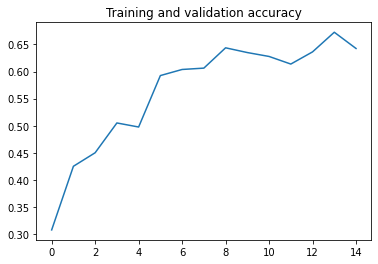

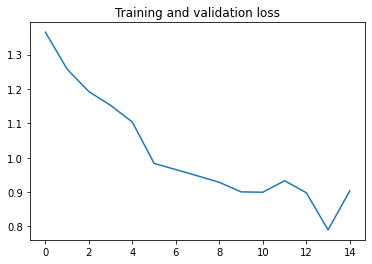

In [ ]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]

loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs
# print(epochs)
# print(acc)
# print(val_acc)
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs,     val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
# saving the trained model to the specied path
# model.save("/content/model")

# creates a HDF5 file 'crop_weed_classifier_model.h5'
model.save('crop_weed_classifier_model.h5')  
# del model  # deletes the existing model

# How to load the saved model

# from keras.models import load_model
# model = load_model('path to the model')

In [ ]:
# Download files from colab
# from google.colab import files
# files.download('/content/sample_data/README.md')

# How to Download Folders from Colab
# !zip -r /content/sample_data.zip /content/sample_data

# lets download the models folder after zipping
# !zip -r /content/model.zip /content/model



In [ ]:
import numpy as np

# importing files from computer to colab for testing accuracy of the model.
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Getting predicting images and  transform them to target size.
  path='/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  
  # changing the received image into an array of pixels.
  x = image.img_to_array(img)
  
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size = 10)

  print(f'The predicted class is { classes[0] }')
  

  if np.array_equal(classes[0], [1.0 ,0.0 ,0.0, 0.0]):
    print(fn + " is a bean plantation.")
  elif np.array_equal(classes[0], [0.0 ,1.0 ,0.0, 0.0]):
    print(fn + " is a plantation of elephant grass (weed). ")
  elif np.array_equal(classes[0], [0.0 ,0.0 ,1.0, 0.0]):
    print(fn + " is a maize plantation. ")
  elif np.array_equal(classes[0], [0.0 ,0.0 ,0.0, 1.0]):
    print(fn + " is a wandering jew plantation (weed). ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


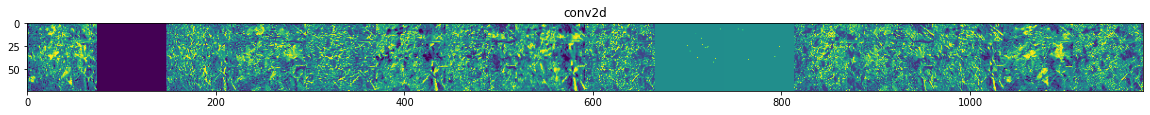

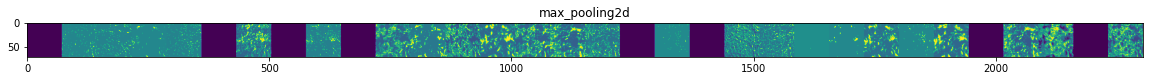

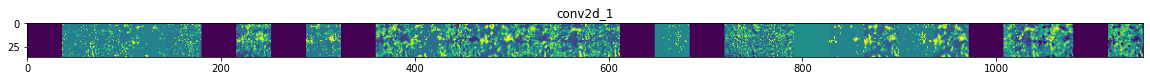

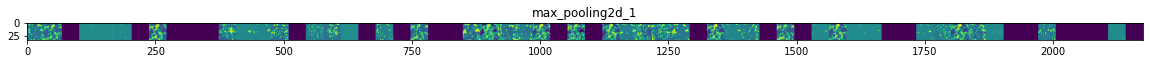

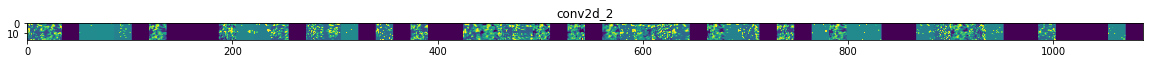

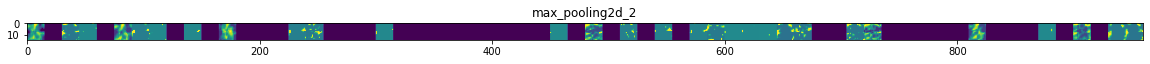

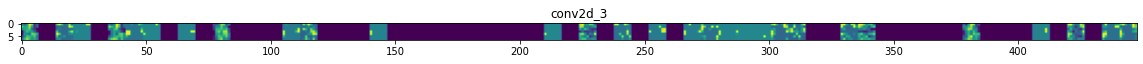

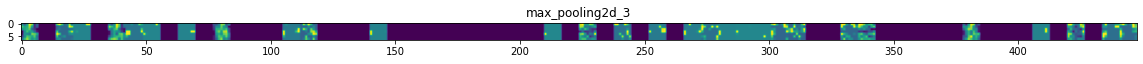

In [ ]:
# Visualizing Intermediate Representations
import numpy as np
import random
from  tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


# Let's prepare a random input image of a crop or weed from the training set.
beans_img_files = [os.path.join(train_beans_dir, f) for f in train_beans_fnames]
elephant_grass_img_files = [os.path.join(train_elephant_grass_dir, f) for f in train_elephant_grass_fnames]
maize_img_files = [os.path.join(train_maize_dir, f) for f in train_maize_fnames]
wandering_jew_img_files = [os.path.join(train_wandering_jew_dir, f) for f in train_wandering_jew_fnames]

img_path = random.choice(beans_img_files + elephant_grass_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
# Clean Up to release the resources
import os, signal

os.kill(     os.getpid() , 
         signal.SIGKILL
       )